In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import layers
import tensorflow as tf
import numpy as np
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

max_numbers = 1024
epochs=7000
loss = 'categorical_crossentropy'

In [2]:

def binary_encode(i):
    return np.array([i >> d & 1 for d in range(10)])


x_data = [binary_encode(i) for i in range(max_numbers)]

In [3]:
def fizz_buzz_encode(i):
    if i % 15 == 0:
        return np.array([0, 0, 0, 1])
    elif i % 5 == 0:
        return np.array([0, 0, 1, 0])
    elif i % 3 == 0:
        return np.array([0, 1, 0, 0])
    else:
        return np.array([1, 0, 0, 0])


y_data = [fizz_buzz_encode(i) for i in range(max_numbers)]

In [4]:
x_data_reshaped = np.array(x_data).reshape(-1, 10)
print(x_data_reshaped[1])
y_data_reshaped = np.array(y_data).reshape(-1, 4)
print(y_data_reshaped[1])

[1 0 0 0 0 0 0 0 0 0]
[1 0 0 0]


In [5]:
x_train, x_test, y_train, y_test = train_test_split(x_data_reshaped, y_data_reshaped, test_size=0.2, random_state=42, shuffle=True)
print(x_train[:3])
print(y_train[:3])

[[1 0 0 1 0 0 0 1 0 0]
 [1 0 0 1 1 1 1 0 1 0]
 [0 0 1 0 0 0 0 1 1 0]]
[[1 0 0 0]
 [1 0 0 0]
 [1 0 0 0]]


In [8]:
model = Sequential()
model.add(Dense(10,activation='relu', input_shape=(10,)))
# model.add(layers.Dropout(0.2))
model.add(Dense(30,activation='relu'))
# model.add(layers.Dropout(0.2))
# model.add(Dense(30,activation='relu'))
# model.add(layers.Dropout(0.2))
model.add(Dense(4,activation='softmax'))

model.summary()

model.compile(loss=loss,
              optimizer="adam",
              metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_5 (Dense)              (None, 30)                330       
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 124       
Total params: 564
Trainable params: 564
Non-trainable params: 0
_________________________________________________________________


In [9]:
history = model.fit(x_train, y_train, batch_size=256, epochs=epochs, verbose=1, validation_data=(x_test, y_test))

 0.9561
Epoch 6865/7000
4/4 [==============================] - 0s 4ms/step - loss: 3.2294e-06 - accuracy: 1.0000 - val_loss: 1.0247 - val_accuracy: 0.9561
Epoch 6866/7000
4/4 [==============================] - 0s 4ms/step - loss: 3.1310e-06 - accuracy: 1.0000 - val_loss: 1.0168 - val_accuracy: 0.9561
Epoch 6867/7000
4/4 [==============================] - 0s 4ms/step - loss: 3.1324e-06 - accuracy: 1.0000 - val_loss: 1.0148 - val_accuracy: 0.9561
Epoch 6868/7000
4/4 [==============================] - 0s 4ms/step - loss: 3.1601e-06 - accuracy: 1.0000 - val_loss: 1.0200 - val_accuracy: 0.9561
Epoch 6869/7000
4/4 [==============================] - 0s 4ms/step - loss: 3.1457e-06 - accuracy: 1.0000 - val_loss: 1.0274 - val_accuracy: 0.9561
Epoch 6870/7000
4/4 [==============================] - 0s 4ms/step - loss: 3.2944e-06 - accuracy: 1.0000 - val_loss: 1.0258 - val_accuracy: 0.9561
Epoch 6871/7000
4/4 [==============================] - 0s 5ms/step - loss: 3.0834e-06 - accuracy: 1.0000 - val

In [15]:
def plotLossHistory(history):
    fig, ax = plt.subplots(figsize=(30,15))
    ax.plot(history.history['loss'], label='loss (training data)')
    ax.plot(history.history['val_loss'], label='loss (validation data)')
    plt.ylabel('Loss value')
    plt.xlabel('No. epoch')
    ax.legend(loc="upper left")
    plt.title(f"loss = {loss}")
    plt.show()

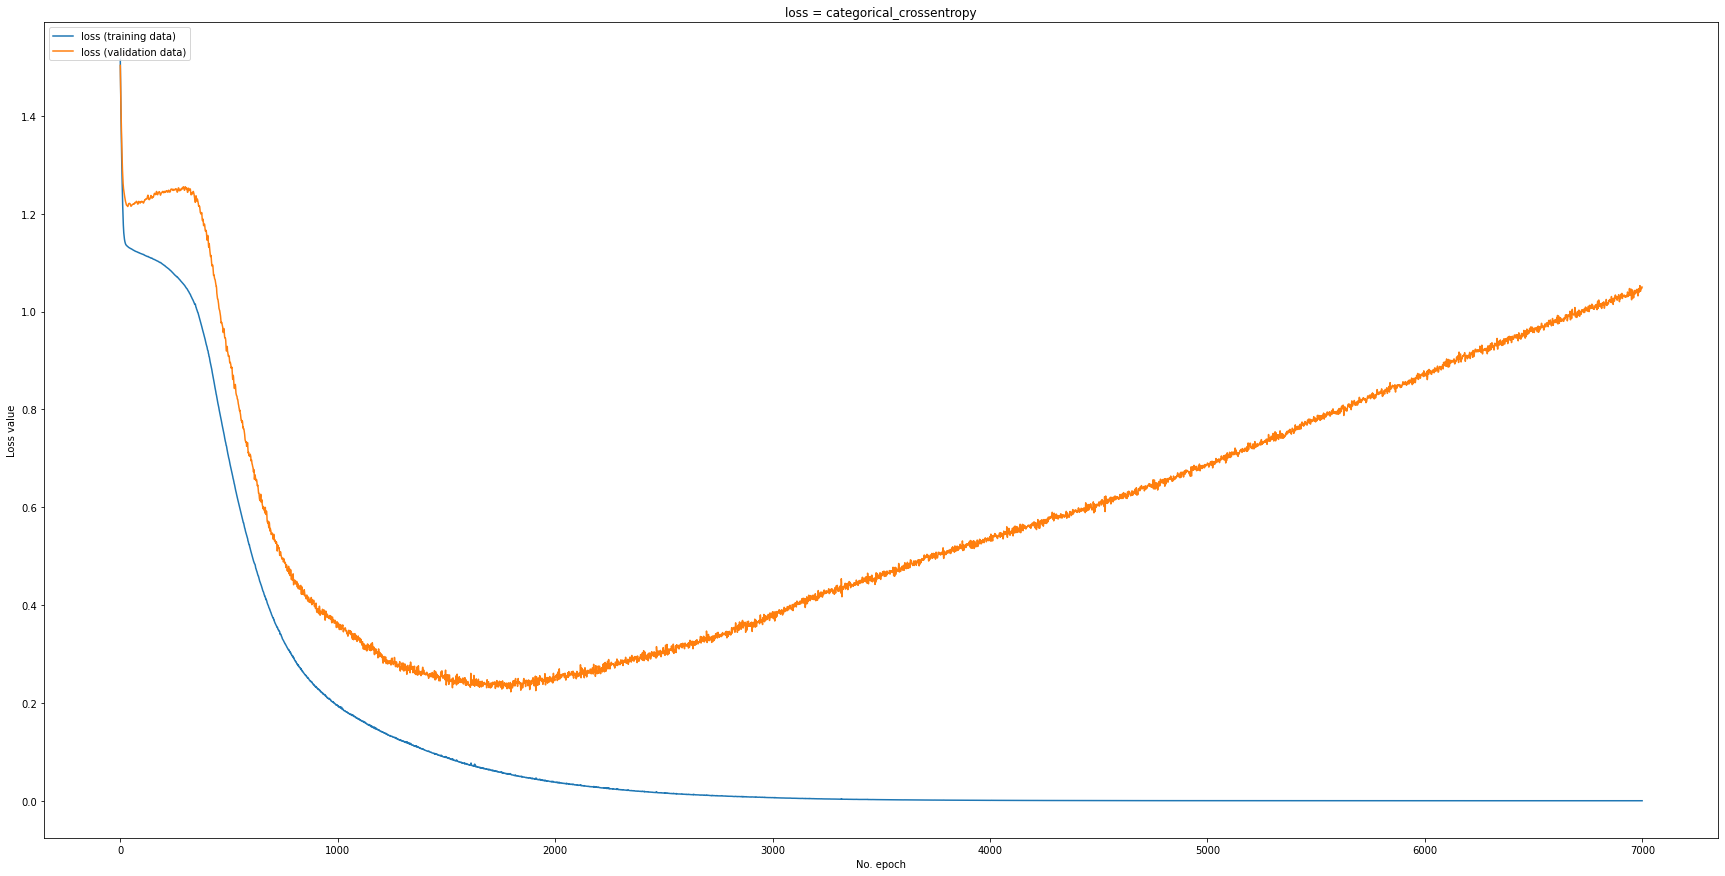

In [16]:
plotLossHistory(history)

Uuhhh we over overfitting so much

In [17]:
def plotAccuracyHistory(history):
    fig, ax = plt.subplots(figsize=(30,15))
    ax.plot(history.history['accuracy'], label='Accuracy')
    ax.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.ylabel('Accuracy value')
    plt.xlabel('No. epoch')
    ax.legend(loc="upper left")
    plt.show()

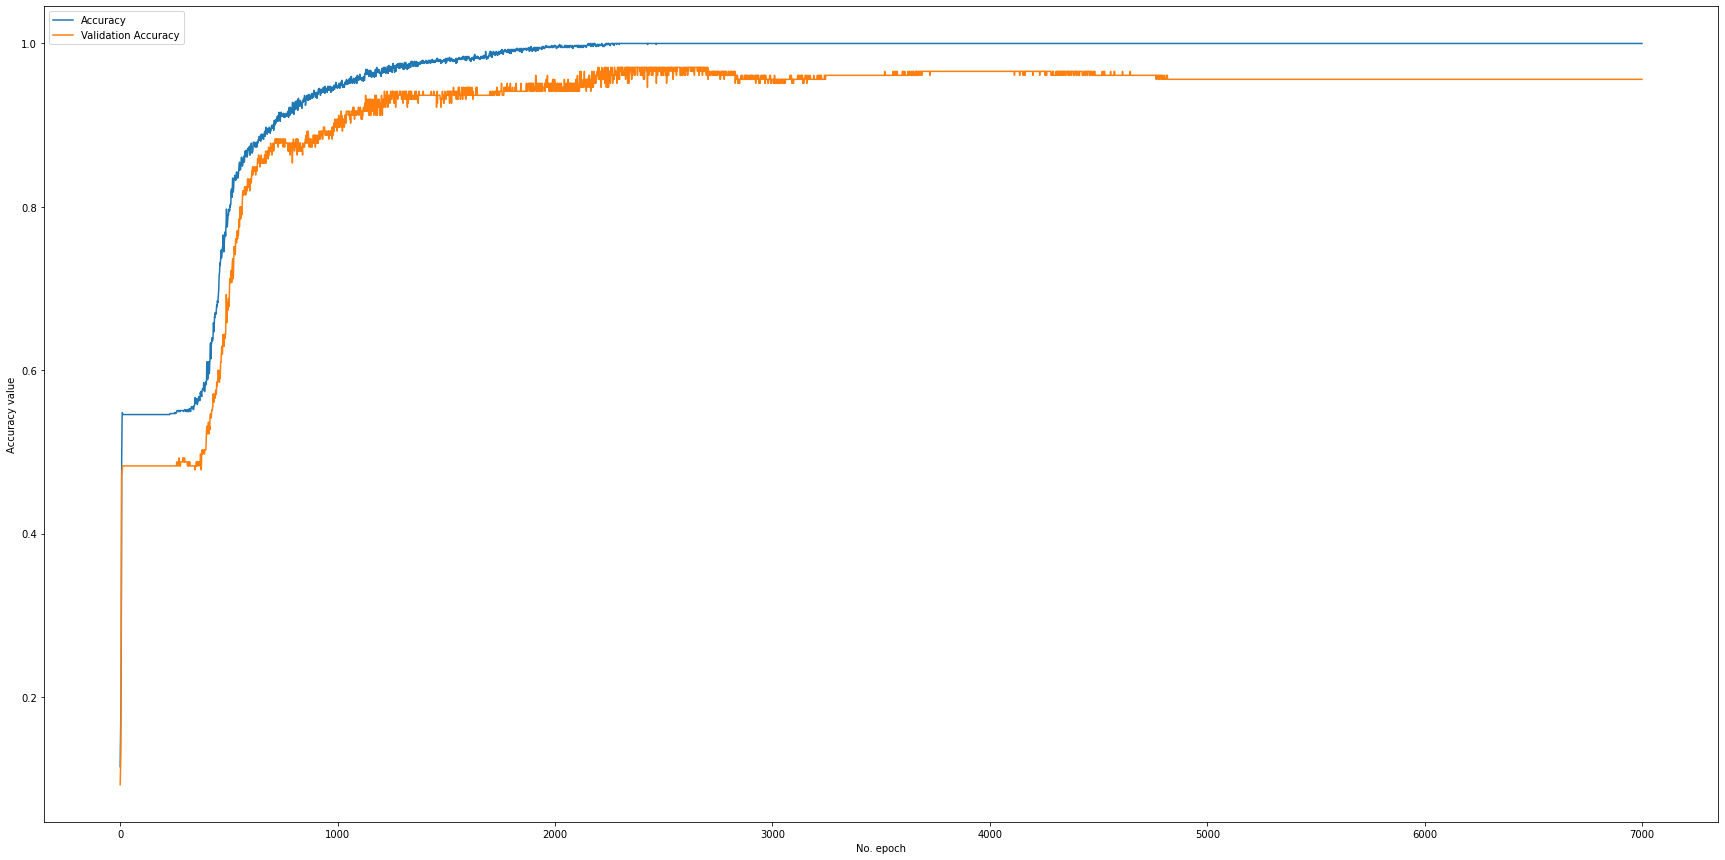

In [18]:
plotAccuracyHistory(history)

In [55]:
to_pred=[binary_encode(i) for i in range(1,16)]
to_pred

[array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 0, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 0, 1, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0]),
 array([0, 1, 1, 1, 0, 0, 0, 0, 0, 0]),
 array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0])]

In [68]:
pred = np.argmax(model.predict(np.array([to_pred])), axis=-1)
pred


array([[0, 0, 1, 0, 2, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3]])

In [69]:
num=0

for val in pred[0]:
    num+=1
    if val == 0:
        print(num)
    if val == 1:
        print("fizz")
    if val == 2:
        print("buzz")       
    if val == 3:
        print("fizzbuzz")

1
2
fizz
4
buzz
fizz
7
8
fizz
buzz
11
fizz
13
14
fizzbuzz


# Hope you enjoyed this atrocity :D